# Building Heating Load Prediction

## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to Github and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df=pd.read_csv('energy.csv')

In [3]:
df.isna().any()

X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
X7    False
X8    False
Y1    False
dtype: bool

In [4]:
print('Number of NaNs in the dataframe:\n',df.isnull().sum())

Number of NaNs in the dataframe:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [6]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object

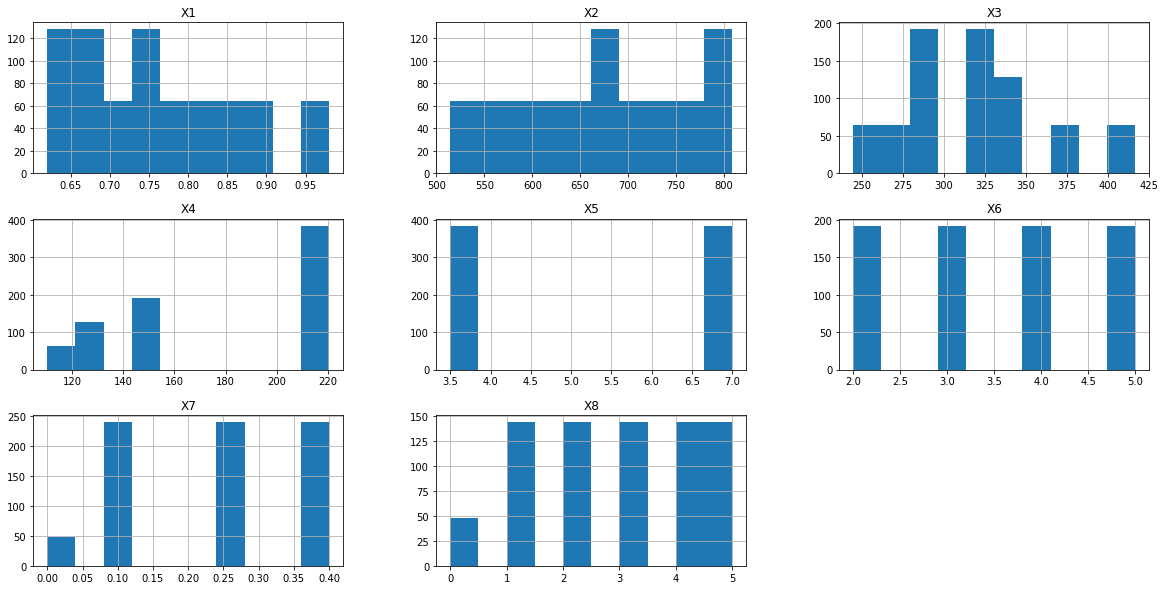

In [7]:
df_feature=df.iloc[:,0:8]
df_feature.hist(figsize=(20,10))
plt.show()

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance. (Train a linear regression model on 80 percent of the given dataset)


In [8]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
LinearRegressionModel= linear_model.LinearRegression()

In [9]:
x = df.drop('Y1', axis=1)
y = df.iloc[:,-1]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

Number of samples in training data: 614
Number of samples in validation data: 154


In [11]:
print ('Training a Linear Regression Model..')
reg=LinearRegression().fit(x_train,y_train)

Training a Linear Regression Model..


In [12]:
print('Coefficient Values = ',reg.coef_)

Coefficient Values =  [-6.33926290e+01 -5.86380428e-02  3.46024305e-02 -4.66202367e-02
  4.36194652e+00  1.81224259e-02  1.98760201e+01  2.19167208e-01]


In [13]:
print('Intercept Value =',reg.intercept_)

Intercept Value = 79.13116174147392



#### Report model performance using 'ROOT MEAN SQUARE':



In [14]:
y_train_predict = reg.predict(x_train)

In [15]:
y_train_predict.shape

(614,)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

training_error = sqrt(mean_squared_error(y_train, y_train_predict))
print ('Training Error:',training_error)

Training Error: 2.9242420751260125


In [17]:
y_test_predict = reg.predict(x_test)
y_test_predict.shape

(154,)

In [18]:
testing_error = sqrt(mean_squared_error(y_test, y_test_predict))
print ('Training Error:',testing_error)

Training Error: 2.905413624299769


Let's see the effect of amount of data on the performance of prediction model. I tried to use a varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data  is the same as above for  all  these cases.

Training Error for 100 amount of Traning data: 2.6927976260900612
Test Error for 100 amount of Test data: 3.0295701230084044 

Training Error for 200 amount of Traning data: 2.8982041095546793
Test Error for 200 amount of Test data: 2.933609137721999 

Training Error for 300 amount of Traning data: 2.9902526518252635
Test Error for 300 amount of Test data: 2.9122365243934363 

Training Error for 400 amount of Traning data: 2.9666693049863304
Test Error for 400 amount of Test data: 2.9071259418855937 

Training Error for 500 amount of Traning data: 2.989532662546814
Test Error for 500 amount of Test data: 2.905240911900156 

Training Error for 614 amount of Traning data: 2.9242420751260125
Test Error for 614 amount of Test data: 2.905413624299769 



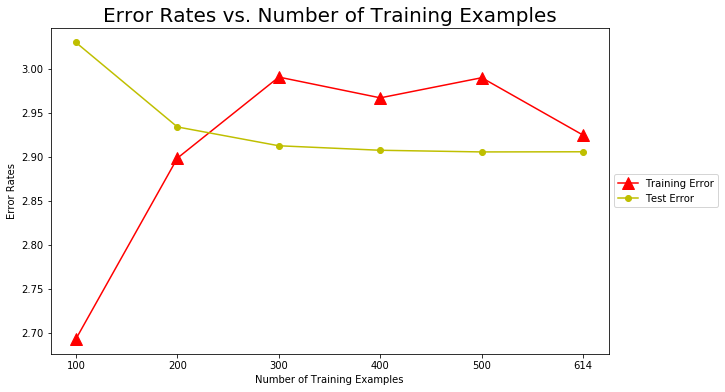

In [19]:
amount=[100,200,300,400,500,614]
training_error_list=[]
testing_error_list=[]
for i in amount:
    x_train_i = x_train[:i]
    y_train_i = y_train[:i]
    reg_i = LinearRegression().fit(x_train_i,y_train_i)
    y_train_i_predict = reg_i.predict(x_train_i)
    training_error_i = sqrt(mean_squared_error(y_train_i, y_train_i_predict))
    print ('Training Error for',i, 'amount of Traning data:',training_error_i)
    y_test_i_predict = reg_i.predict(x_test)
    testing_error_i = sqrt(mean_squared_error(y_test, y_test_i_predict))
    print ('Test Error for',i, 'amount of Test data:',testing_error_i,'\n')
    training_error_list.append(training_error_i)
    testing_error_list.append(testing_error_i)
    
fig, ax = plt.subplots(figsize=(10, 6))
my_xticks = ['100', '200', '300', '400', '500','614']
p1 = ax.plot(my_xticks,training_error_list, marker="^", markersize=12, color='r')
p2 = ax.plot(my_xticks,testing_error_list,marker='.',markersize=12, color='y')
ax.set_title('Error Rates vs. Number of Training Examples',fontsize=20)
ax.set_xlabel('Number of Training Examples')
ax.set_ylabel('Error Rates')
ax.legend((p1[0], p2[0]), ('Training Error', 'Test Error'),loc='center left', bbox_to_anchor=(1, 0.5))
ax.autoscale_view() 

**Comment:**
From the relationship I observe in the plot:
1. There is a relationship between the amount of data used to train the model and the validation accuracy of the model, which is: when the amount of training data increases from 100 to all, the chart shows a significant decrease in the test errors, hence, there would be an increase in the test accuracy.
2. As for Training accuracy, the chart shows an increase in the training errors when the amount of training data increase from 100 to all, hence, there would be a decrease in the training accuracy. 

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Using this datset with transformed 'heating load', a  logistic regression classifiction model will be created to predict heating load type of a building. (test-train split ratio of 0.8 : 0.2)

In [20]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [21]:
def classifier(row):
    if row['Y1'] <14:
        return 'Low'
    elif row['Y1'] >14 and row['Y1'] <28:
        return 'Medium'
    else:
        return 'High'
     
df['Y2'] = df.apply(lambda row: classifier(row), axis=1)
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,Medium
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,Medium
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,Medium
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,Medium
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,Medium


In [22]:
df2=df.drop('Y1',axis=1)
X=df2.iloc[:,:-1]
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [23]:
Y=df['Y2']
print (Y.value_counts())

High      283
Medium    267
Low       218
Name: Y2, dtype: int64


In [24]:
Y=Y.map({'Low': 0, 'Medium': 1,'High' :2})
print (Y.value_counts())

2    283
1    267
0    218
Name: Y2, dtype: int64


In [25]:
print("Feature vector shape=", X.shape)
print("Class shape=", Y.shape)

Feature vector shape= (768, 8)
Class shape= (768,)


         X1   X2   X3   X4   X5   X6   X7   X8
Y2                                            
High    283  283  283  283  283  283  283  283
Low     218  218  218  218  218  218  218  218
Medium  267  267  267  267  267  267  267  267


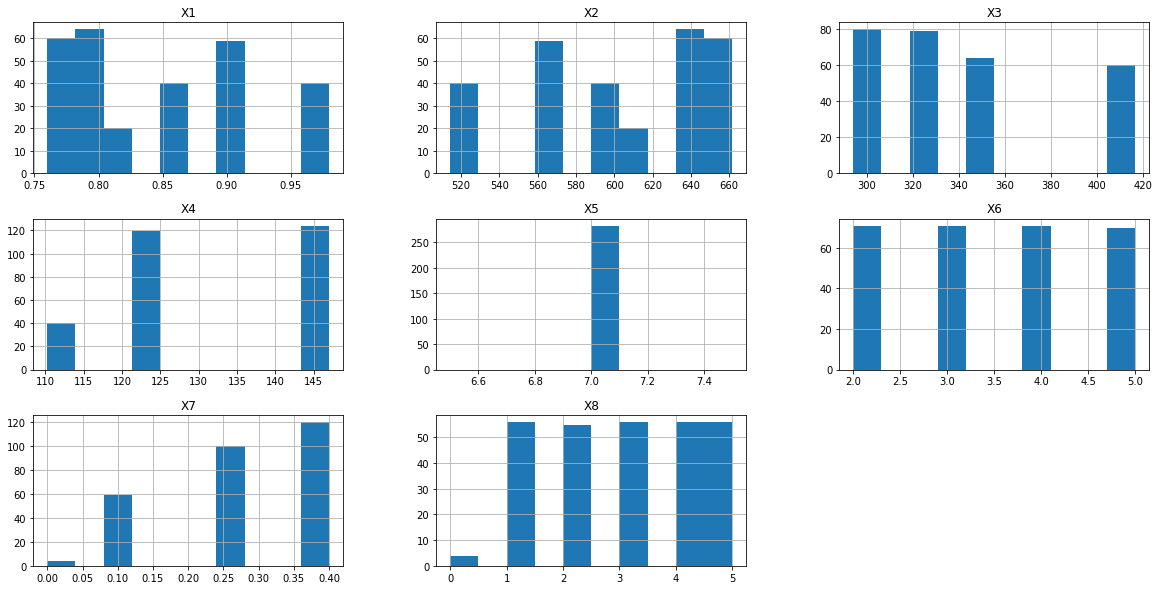

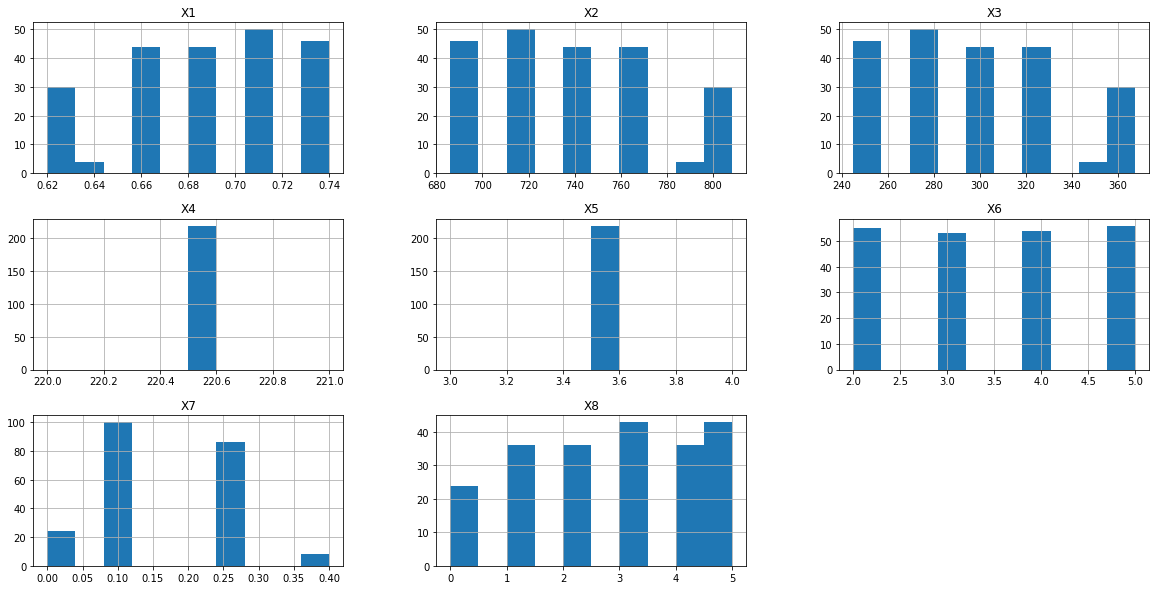

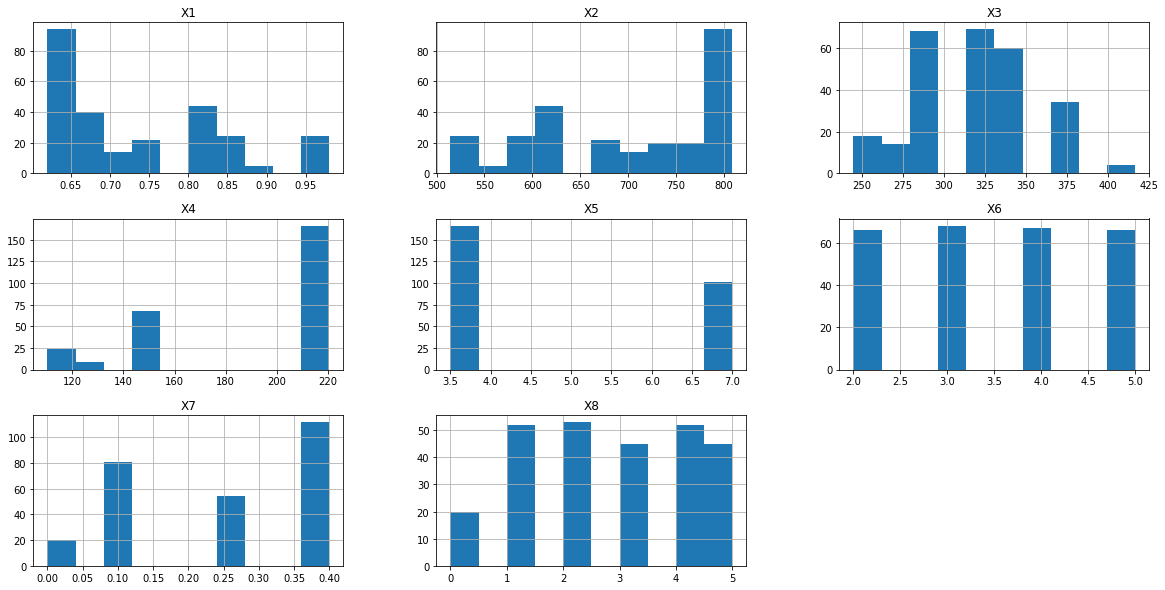

In [26]:
print(df2.groupby('Y2').count())

df2.groupby('Y2').hist(figsize=(20,10))
plt.show()

In [27]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train2))
print ('Number of samples in validation data:',len(x_test2))

Number of samples in training data: 614
Number of samples in validation data: 154


In [28]:
LogisticRegressionModel = linear_model.LogisticRegression()

print ('Training a Logistic Regression Model..')
LogisticRegressionModel.fit(x_train2, y_train2)

Training a Logistic Regression Model..


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
training_accuracy=LogisticRegressionModel.score(x_train2,y_train2)
print ('Training Accuracy:',training_accuracy)

Training Accuracy: 0.8078175895765473


In [30]:
test_accuracy=LogisticRegressionModel.score(x_test2,y_test2)
print('Test Accuracy: ',test_accuracy)

Test Accuracy:  0.7727272727272727


In [31]:
from sklearn.metrics import confusion_matrix

y_true = y_test2
y_pred = LogisticRegressionModel.predict(x_test2)
ConfusionMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted Low','Predicted Medium','Predicted High'],index=['Actual Low','Actual Medium','Actual High'])
print ('Confusion matrix is: \n',ConfusionMatrix)


Confusion matrix is: 
                Predicted Low  Predicted Medium  Predicted High
Actual Low                42                 1               0
Actual Medium              9                22              25
Actual High                0                 0              55


One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance based classification, SVM or K means or those that involve gradient descent optimization. If we  Scale features in the range [0,1] it is called unity based normalization.

Now I will perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with my previous model. 

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [32]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train2_minmax = min_max_scaler.fit_transform(x_train2)
x_train2_minmax

array([[0.11111111, 0.83333333, 0.42857143, ..., 0.        , 1.        ,
        0.6       ],
       [0.38888889, 0.5       , 1.        , ..., 0.33333333, 0.25      ,
        0.2       ],
       [0.11111111, 0.83333333, 0.42857143, ..., 0.33333333, 0.25      ,
        0.2       ],
       ...,
       [0.55555556, 0.33333333, 0.42857143, ..., 0.66666667, 0.625     ,
        0.4       ],
       [0.25      , 0.66666667, 0.14285714, ..., 1.        , 0.25      ,
        0.2       ],
       [0.05555556, 0.91666667, 0.57142857, ..., 0.        , 0.625     ,
        1.        ]])

In [33]:
x_test2_minmax = min_max_scaler.transform(x_test2)
x_test2_minmax

array([[0.25      , 0.66666667, 0.14285714, ..., 0.33333333, 0.25      ,
        0.6       ],
       [0.55555556, 0.33333333, 0.42857143, ..., 0.33333333, 0.25      ,
        1.        ],
       [0.55555556, 0.33333333, 0.42857143, ..., 1.        , 0.25      ,
        0.8       ],
       ...,
       [0.55555556, 0.33333333, 0.42857143, ..., 0.33333333, 1.        ,
        0.6       ],
       [0.19444444, 0.75      , 0.28571429, ..., 1.        , 1.        ,
        0.6       ],
       [0.38888889, 0.5       , 1.        , ..., 0.        , 0.25      ,
        0.4       ]])

In [34]:
print ('Training a Logistic Regression Model..')
LogisticRegressionModel.fit(x_train2_minmax, y_train2)

Training a Logistic Regression Model..


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
training_accuracy_minmax=LogisticRegressionModel.score(x_train2_minmax,y_train2)
print ('Training Accuracy after Feature Scaling:',training_accuracy_minmax)

Training Accuracy after Feature Scaling: 0.8224755700325733


In [36]:
test_accuracy_minmax=LogisticRegressionModel.score(x_test2_minmax,y_test2)
print('Test Accuracy after Feature Scaling: ',test_accuracy_minmax)

Test Accuracy after Feature Scaling:  0.8116883116883117


In [37]:
y_true = y_test2
y_pred = LogisticRegressionModel.predict(x_test2_minmax)
ConfusionMatrix_minmax = pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted Low','Predicted Medium','Predicted High'],index=['Actual Low','Actual Medium','Actual High'])
print ('Confusion matrix after Feature Scaling is: \n',ConfusionMatrix_minmax)

Confusion matrix after Feature Scaling is: 
                Predicted Low  Predicted Medium  Predicted High
Actual Low                40                 3               0
Actual Medium              2                30              24
Actual High                0                 0              55


**Comment: Compare model performance in training and validation with my previous model:**

1. Compared to the previous model, the Logistic Regression Model with Feature Scaling performs beter with the Training Accuracy is 0.82 (1% higher than that of the previous model, which is 0.807)

2. Compared to the previous model, the Logistic Regression Model with Feature Scaling performs beter with the Test Accuracy is 0.81 (5% higher than that of the previous model, which is 0.77)